# **AI_Mental_Fitness_Tracker**

The **Mental Fitness Tracker** project, developed by IBM** in collaboration with AICTE, IBMSkills, and Edunet, is an artificial intelligence-based solution aimed at monitoring and improving mental well-being. This innovative system leverages AI technologies to track and analyze user behavior, emotions, and mental health indicators.

# Information

---
Name: Kulkarni Shubham Mahendra
---


Email:- kulkarnishub377@gmail.com---


[linkedin profile](https:///www.linkedin.com/in/kulkarni-shubham-sk)

## Importing Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load the datasets
df1 = pd.read_csv('/content/mental-and-substance-use-as-share-of-disease (1).csv')
df2= pd.read_csv('/content/prevalence-by-mental-and-substance-use-disorder.csv')

### DATA Visualization

In [4]:
dataset=pd.merge(df1,df2)
dataset.head()


,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [5]:
#set axis
dataset.set_axis(['Country','Code','Year','DALY','Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders'], axis='columns', inplace='True')

In [6]:
# Feature Engineering
# Select relevant features for mental fitness tracking
features = [ 'Schizophrenia','Bipolar disorder','Eating disorders',' Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders']


[]

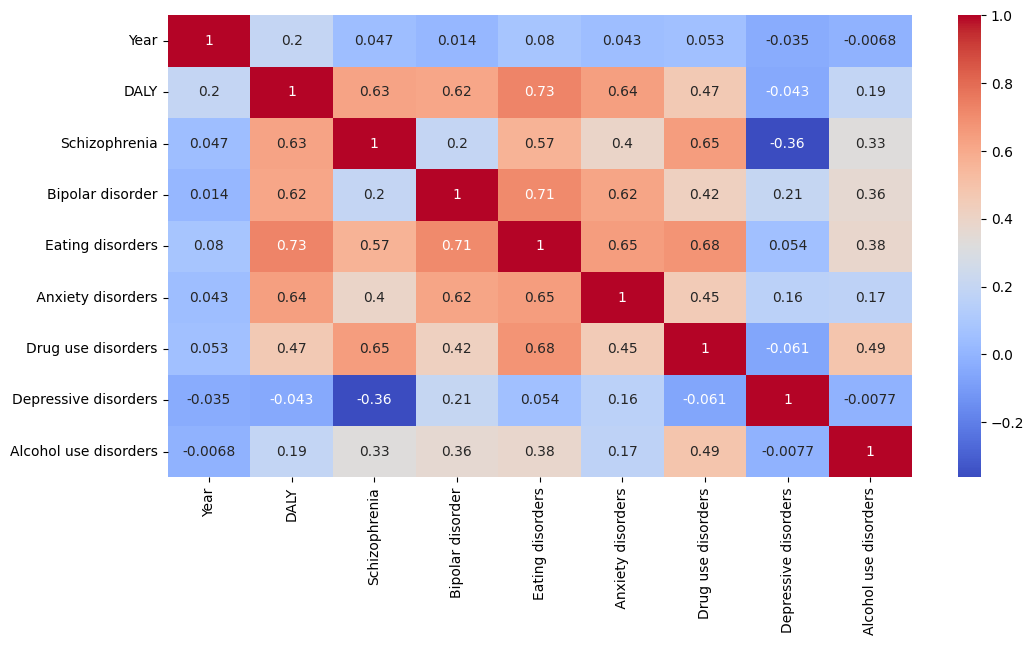

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.plot()

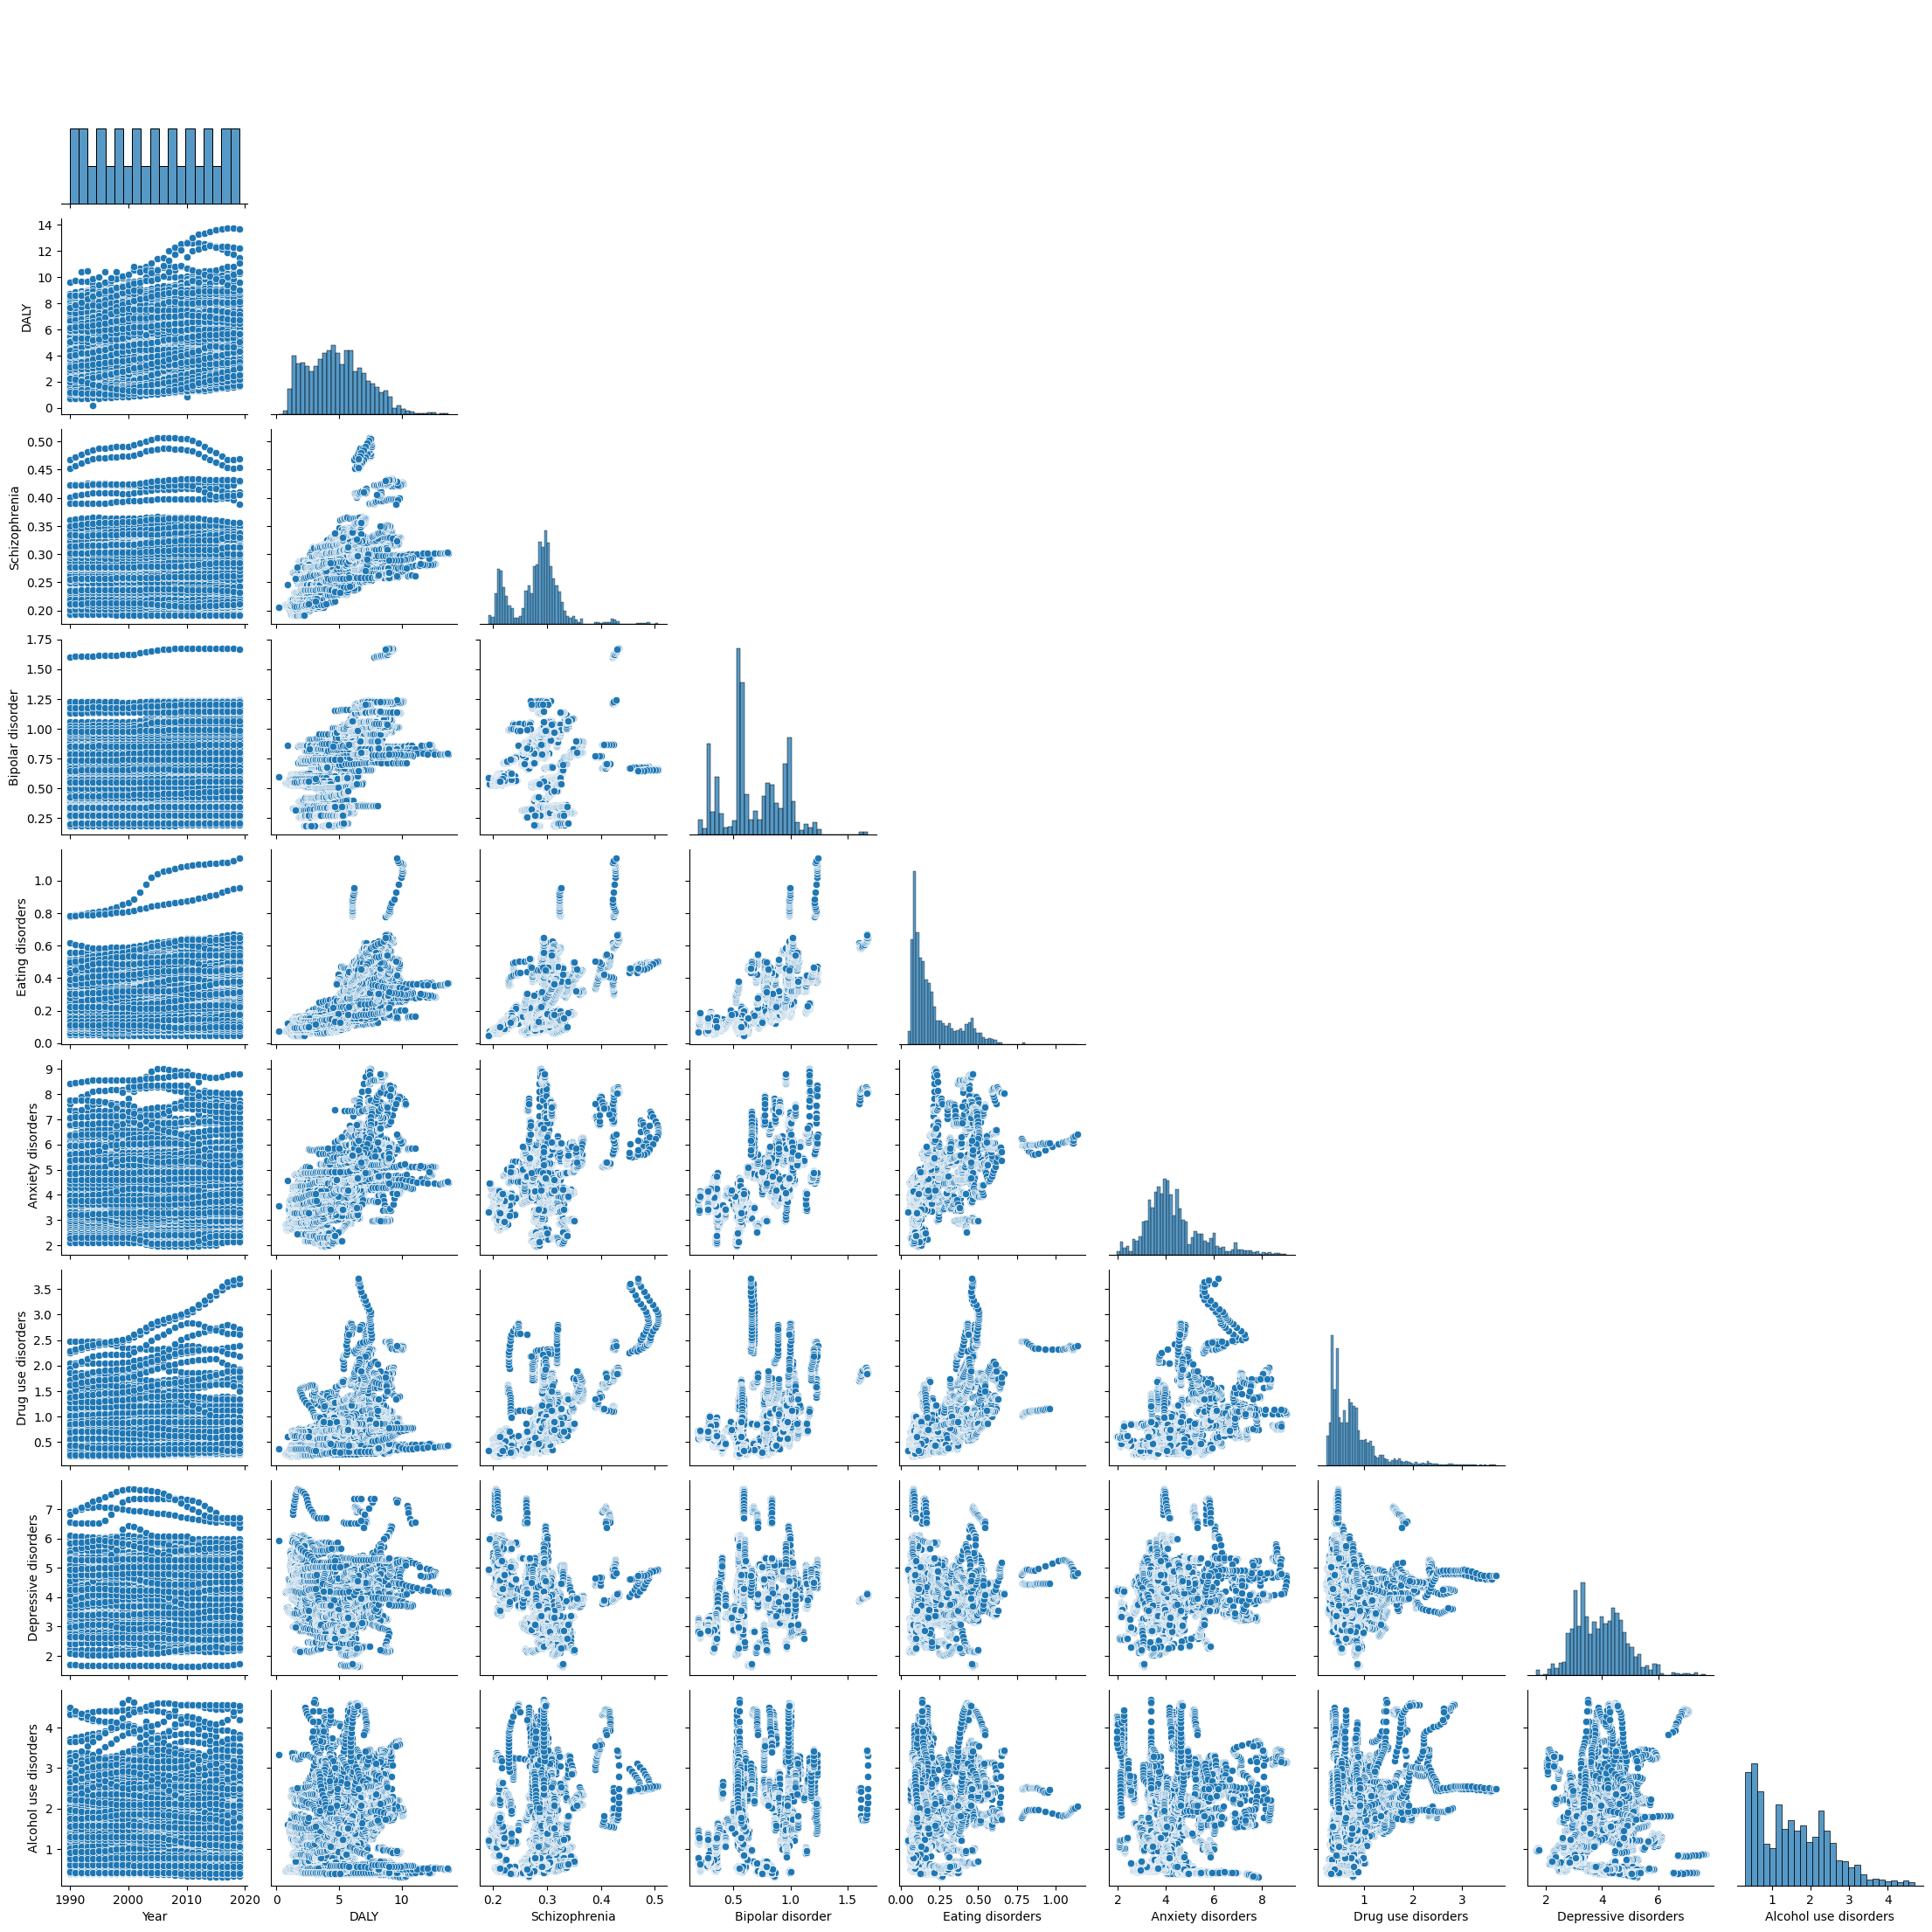

In [8]:
sns.pairplot(dataset, corner= True)
plt.show()

In [9]:
mean=dataset['DALY'].mean()
mean

4.8180618117506135

In [15]:
import plotly.express as px
fig=px.pie(dataset,values='DALY',names='Year')
fig.show()

In [13]:
#yearwise variation in Different countries mental fitness
fig=px.line_3d(dataset,x='Year',y='DALY',z='Country',color='Country' ,markers=True,template='plotly_dark')
fig.show()

# **Encoding the Categorical values**

In [18]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        dataset[i]=l.fit_transform(dataset[i])


dataset.head()

,Country,Code,Year,DALY,Schizophrenia,Bipolar disorder,Eating disorders,Anxiety disorders,Drug use disorders,Depressive disorders,Alcohol use disorders
0,0,0,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,0,0,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,0,0,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,0,0,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,0,0,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


# **Assigning feautre of Matrix and Dependent Variable**

In [19]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values



# **Implementing the Regression Algorithms and choose which one is better based on results**

# **1)Linear regression**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# **Spliting the Dataset into Training set and Test set**

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

#predicting the value

y_pred=lr.predict(x_test)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for Linear Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))




Results for Linear Regression:
1)Mean Square Error=0.5651664265811192
2)R-Square Score=0.34097177937818024


# **2)SVM Regression**

In [22]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

#predicting the value

y_pred=svr.predict(x_test)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for SVM Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))




Results for SVM Regression:
1)Mean Square Error=0.8666248850406174
2)R-Square Score=-0.010552341882487992


# **3)Decision Tree Regression**

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

#predicting the value

y_pred=dtr.predict(x_test)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for Decision Tree Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))



Results for Decision Tree Regression:
1)Mean Square Error=0.020214679702227862
2)R-Square Score=0.976428103708869


# **4)Random Forest Regression**

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=10,random_state=42)
rfr.fit(x_train,y_train)

#predicting the value

y_pred=rfr.predict(x_test)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for Decision Tree Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(y_test,y_pred),r2_score(y_test,y_pred)))




Results for Decision Tree Regression:
1)Mean Square Error=0.00722619960333872
2)R-Square Score=0.991573686541759


# **Conclusion:**

# **Random Forest Regression works** well on both train and test sets with r2 score of 0.99.

# As well as **Decision Tree Regression** also works well on both train and test set with r2 score of 0.98.

# **Predicting the value from the model using Random Forest Regression**

In [ ]:
np.random.seed(range(0,100))
print("Welcome to Mental Fitness Tracker!\nFill the detail to check your mental fitness!")
country=l.fit_transform([input('Enter Your country Name:')])
year=int(input("Enter the Year:"))
schi=(float(input("Enter your Schizophrenia rate in % (it not enter 0):")))*100
bipo_dis=(float(input("Enter your Bipolar disorder rate in % (it not enter 0):")))*100
eat_dis=(float(input("Enter your Eating disorder rate in % (it not enter 0):")))*100
anx=(float(input("Enter your Anxiety rate in % (it not enter 0):")))*10
drug_use=(float(input("Enter your Drug Usage rate in per year % (it not enter 0):")))*100
depr=(float(input("Enter your Depression rate in % (it not enter 0):")))*10
alch=(float(input("Enter your Alcohol Consuming rate per year in % (it not enter 0):")))*100

prediction=rfr.predict([[country,year,schi,bipo_dis,eat_dis,anx,drug_use,depr,alch]])
print("Your Mental Fitness is {}%".format(prediction))
print("Bye...!")

Welcome to Mental Fitness Tracker!
Fill the detail to check your mental fitness!
Enter Your country Name:India
Enter the Year:2023
Enter your Schizophrenia rate in % (it not enter 0):20
Enter your Bipolar disorder rate in % (it not enter 0):30
Enter your Eating disorder rate in % (it not enter 0):20
Enter your Anxiety rate in % (it not enter 0):40
Enter your Drug Usage rate in per year % (it not enter 0):30
Enter your Depression rate in % (it not enter 0):44
Enter your Alcohol Consuming rate per year in % (it not enter 0):22
Your Mental Fitness is [9.82035265]%
Bye...!
